# Основы визуализации данных с помощью matplotlib

## Урок 6. Частые ошибки визуализации

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


In [ ]:
df1 = df[df['Year'] == 2000].sort_values('Salary', ascending=False).head(3)
df1

,Year,State,Salary,IsCoastal
1799,2000,Oregon,6.50,1
1811,2000,Washington,6.50,1
1766,2000,Connecticut,6.15,1


Text(0, 0.5, '$/час')

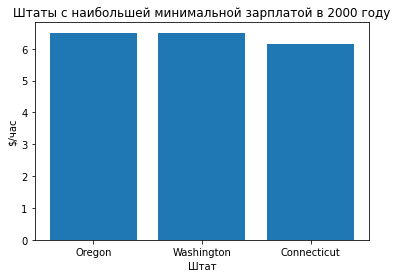

In [ ]:
plt.bar(df1['State'], df1['Salary'])
plt.title("Штаты с наибольшей минимальной зарплатой в 2000 году")
plt.xlabel('Штат')
plt.ylabel('$/час')

### Типичные ошибки при создании визуализаций

#### Отсутствие подписей

Начнем с самой частой ошибки, которую допускают при создании визуализаций. Это отсутствующие подписи осей и заголовка. Давайте посмотрим на следующий график.


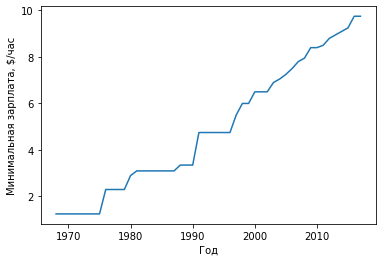

In [ ]:
series = df[df['State'] == 'Oregon'].groupby('Year')['Salary'].mean()
plt.xlabel('Год')
plt.ylabel('Минимальная зарплата, $/час')
plt.plot(series)

Знаете, что он визуализирует? Можно предположить, что рост какого-то параметра. И поскольку мы 5 предыдущих модулей рассматривали минимальную зарплату в штатах, то, скорее всего, это рост минимальной зарплаты в каком-то штате. Или в нескольких штатах. Или только в штатах на побережье. Мы не знаем наверняка, потому что нет никакой информации об использованных данных. Давайте исправим ситуацию.

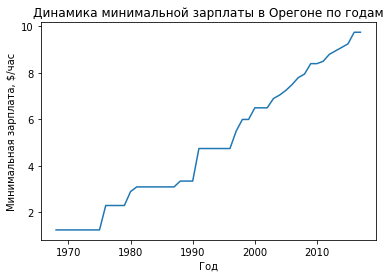

In [ ]:
series = df[df['State'] == 'Oregon'].groupby('Year')['Salary'].mean()
plt.title("Динамика минимальной зарплаты в Орегоне по годам")
plt.xlabel('Год')
plt.ylabel('Минимальная зарплата, $/час')
plt.plot(series)

#### Неправильно выбранный тип графика

Text(0.5, 1.0, 'Сравнение минимальной зарплаты по прибрежным штатам в 2017 году')

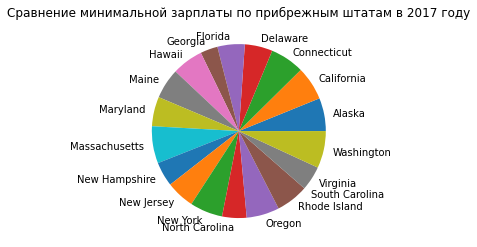

In [ ]:
serie2 = df[(df['Year'] == 2017) & (df['IsCoastal'] == 1)][['State', 'Salary']]
plt.pie(serie2['Salary'], labels=serie2['State'])
plt.title('Сравнение минимальной зарплаты по прибрежным штатам в 2017 году')

Этот график содержит сразу несколько ошибок. Начнем с первой. Судя по заголовку, этот график должен сравнивать минимальные зарплаты в прибрежных штатах в 2017 году. Однако круговая диаграмма не подходит для такого сравнения, потому что она показывает часть от целого. Нет никакого смысла складывать минимальные зарплаты в 19 штатах, потому что эта величина не дает нам совершенно никакой информации. Если мы хотим сравнить минимальную зарплату между штатами, лучше для этого воспользоваться столбчатой диаграммой, вроде такой:


Text(0.5, 1.0, 'Сравнение минимальной зарплаты по прибрежным штатам в 2017 году')

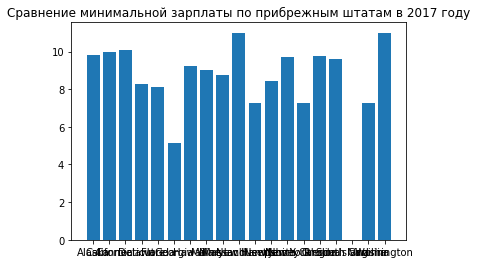

In [ ]:
serie2 = df[(df['Year'] == 2017) & (df['IsCoastal'] == 1)][['State', 'Salary']]
plt.bar(serie2['State'], serie2['Salary'])
plt.title('Сравнение минимальной зарплаты по прибрежным штатам в 2017 году')

Но здесь мы получаем следующую проблему: метки категорий совершенно нечитаемы, потому что их слишком много. И это иллюстрирует сразу 2 связанные между собой ошибки визуализации.


#### Перегруженный/нечитаемый график

Первая - слишком перегруженный или нечитаемый график. Категорий слишком много, их метки перекрывают друг друга. Значит, нужно повысить читаемость графика или оставить меньше категорий. 
Чтобы повысить читаемость графика, можем повернуть метки на горизонтальной оси против часовой стрелки. 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

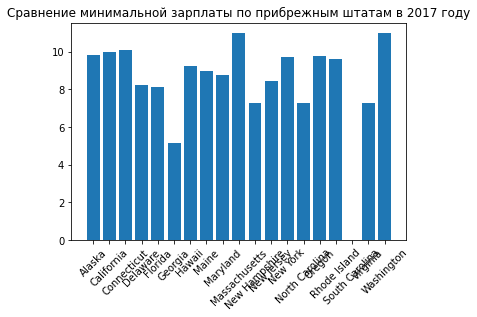

In [ ]:
serie2 = df[(df['Year'] == 2017) & (df['IsCoastal'] == 1)][['State', 'Salary']]
plt.bar(serie2['State'], serie2['Salary'])
plt.title('Сравнение минимальной зарплаты по прибрежным штатам в 2017 году')
plt.xticks(rotation=45)

#### Невнятное ключевое сообщение

Чем больше на графике данных, или их различных атрибутов, тем выше опасность того, что ключевое сообщение графика окажется размытым. Нам нужно определиться, что мы хотим показать на графике: штаты с наибольшей или наименьшей минимальной зарплатой, или, может быть, на одном графике показать штат с наибольшей и наименьшей минимальной зарплатой, чтобы показать разрыв между ними? Кажется, в этом случае получим более конкретное сообщение графика. 

Text(0, 0.5, 'Минимальная зарплата, $/час')

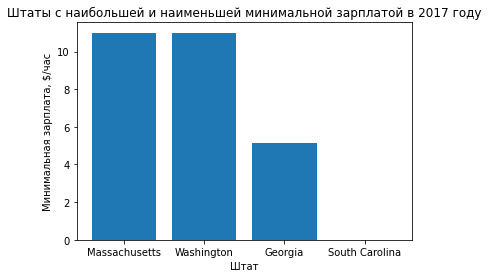

In [ ]:
serie2 = df[(df['Year'] == 2017) & (df['IsCoastal'] == 1)][['State', 'Salary']].sort_values('Salary', ascending=False).iloc[[0, 1, -1, -2],:].sort_values('Salary', ascending=False)
plt.bar(serie2['State'], serie2['Salary'])
plt.title('Штаты с наибольшей и наименьшей минимальной зарплатой в 2017 году')
plt.xlabel('Штат')
plt.ylabel('Минимальная зарплата, $/час')